In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('train.tsv', sep='\t')
df_test = pd.read_csv('test.tsv', sep='\t')

# Rename columns
df.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'job', 'state', 'party', 'barely_true', 'false', 'half_true', 'mostly_true', 'pants_on_fire', 'context']
df_test.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'job', 'state', 'party', 'barely_true', 'false', 'half_true', 'mostly_true', 'pants_on_fire', 'context']

# concatenate train and test set
df = pd.concat([df, df_test], ignore_index=True)


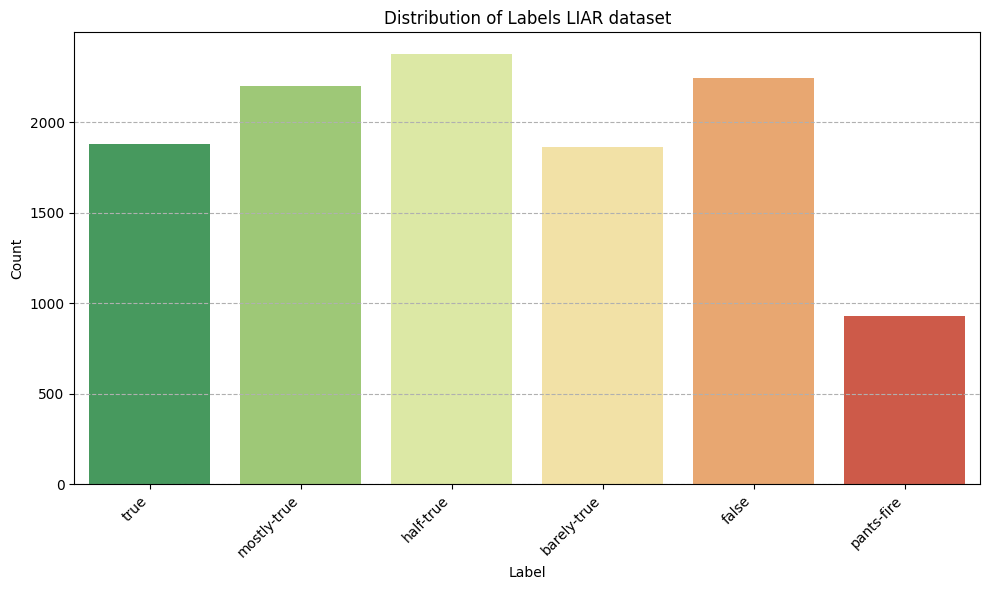

In [5]:

# Define the color palette from green to red
colors = sns.color_palette("RdYlGn_r", len(df['label'].unique()))

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the order of the labels
label_order = ['true', 'mostly-true', 'half-true', 'barely-true', 'false', 'pants-fire']

# Plot the count of each label with the defined color palette and label order
ax = sns.countplot(x='label', data=df, palette=colors, order=label_order)

# Set the title and axis labels
ax.set_title('Distribution of Labels LIAR dataset')
ax.set_xlabel('Label')
ax.set_ylabel('Count')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a grid
ax.grid(True, axis='y', linestyle='--')


plt.tight_layout()

# Save the plot
plt.savefig('label_distribution_LIAR.png', dpi=300)



In [13]:
# classify the labels into 2 classes: true and false
df['label'] = df['label'].replace(['mostly-true'], 'true')
df['label'] = df['label'].replace(['half-true'], 'true')
df['label'] = df['label'].replace(['barely-true'], 'false')
df['label'] = df['label'].replace(['pants-fire'], 'false')



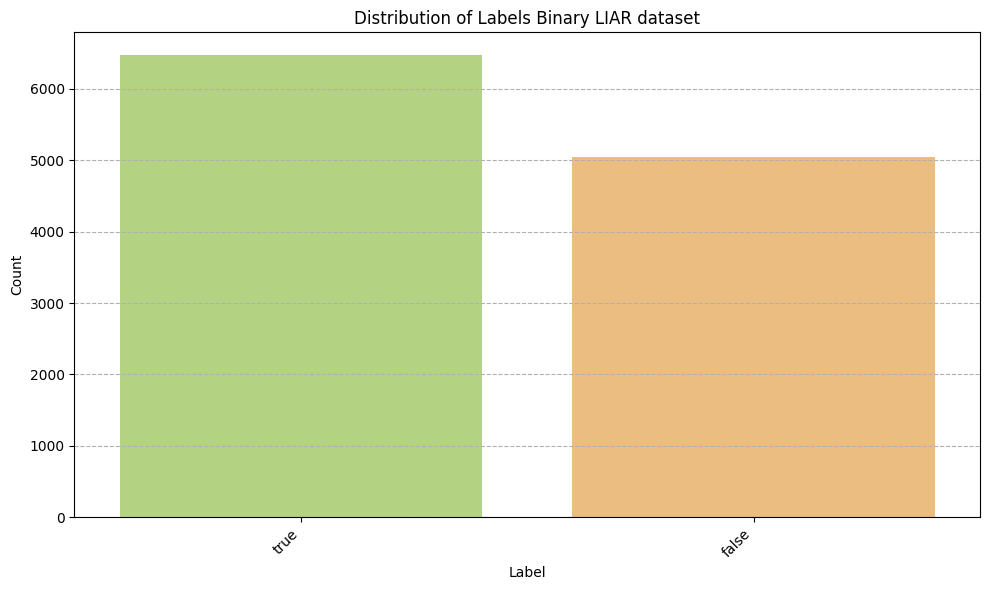

In [16]:
# plot the distribution of the labels
colors = sns.color_palette("RdYlGn_r", len(df['label'].unique()))
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='label', data=df, palette=colors)
ax.set_title('Distribution of Labels Binary LIAR dataset')
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('label_distribution_Binary_LIAR_binary.png', dpi=300)


In [18]:
# calucalte the percentage of true and false labels
true = df['label'].value_counts()[0]
false = df['label'].value_counts()[1]

print('Percentage of true labels: {:.2f}%'.format(true / (true + false) * 100))
print('Percentage of false labels: {:.2f}%'.format(false / (true + false) * 100))

Percentage of true labels: 56.19%
Percentage of false labels: 43.81%
